<a href="https://colab.research.google.com/github/Dharani-Guda/Food-Calorie-Estimation/blob/main/FoodClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Check if GPU is enabled
import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())

2.8.2
/device:GPU:0


In [ ]:
# Helper function to download data and extract
import os
def get_data_extract():
  if "food-101" in os.listdir():
    print("Dataset already exists")
  else:
    print("Downloading the data...")
    !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
    print("Dataset downloaded!")
    print("Extracting data..")
    !tar xzvf food-101.tar.gz
    print("Extraction done!")

In [ ]:
# Download data and extract it to folder
get_data_extract()

In [ ]:
# Check the extracted dataset folder
!ls food-101/

images	license_agreement.txt  meta  README.txt


In [ ]:
import os
os.listdir('food-101/images')

['poutine',
 'clam_chowder',
 'churros',
 'deviled_eggs',
 'gyoza',
 'club_sandwich',
 'tuna_tartare',
 'onion_rings',
 'crab_cakes',
 'cheesecake',
 'chicken_quesadilla',
 'sashimi',
 'frozen_yogurt',
 'steak',
 'grilled_cheese_sandwich',
 'miso_soup',
 'macarons',
 'edamame',
 'paella',
 'fried_calamari',
 'creme_brulee',
 'nachos',
 'pho',
 'guacamole',
 'bruschetta',
 'french_fries',
 'seaweed_salad',
 'mussels',
 'bibimbap',
 'chicken_wings',
 'greek_salad',
 'hot_dog',
 'breakfast_burrito',
 'cannoli',
 'ravioli',
 'grilled_salmon',
 'french_onion_soup',
 'beef_tartare',
 'fish_and_chips',
 'prime_rib',
 'lobster_roll_sandwich',
 'spaghetti_bolognese',
 'oysters',
 'escargots',
 'pork_chop',
 'shrimp_and_grits',
 'carrot_cake',
 'pancakes',
 'beignets',
 'omelette',
 'tiramisu',
 'pizza',
 'caesar_salad',
 'panna_cotta',
 'hamburger',
 'garlic_bread',
 'hummus',
 'filet_mignon',
 'chocolate_cake',
 'fried_rice',
 'apple_pie',
 'ramen',
 'peking_duck',
 'macaroni_and_cheese',
 'ch

In [ ]:
os.listdir('food-101/meta')

['classes.txt',
 'train.json',
 'test.txt',
 'test.json',
 'train.txt',
 'labels.txt']

In [ ]:
!head food-101/meta/train.txt

apple_pie/1005649
apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283
apple_pie/1050519
apple_pie/1057749
apple_pie/1057810
apple_pie/1072416
apple_pie/1074856


In [ ]:
!head food-101/meta/classes.txt

apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
import os

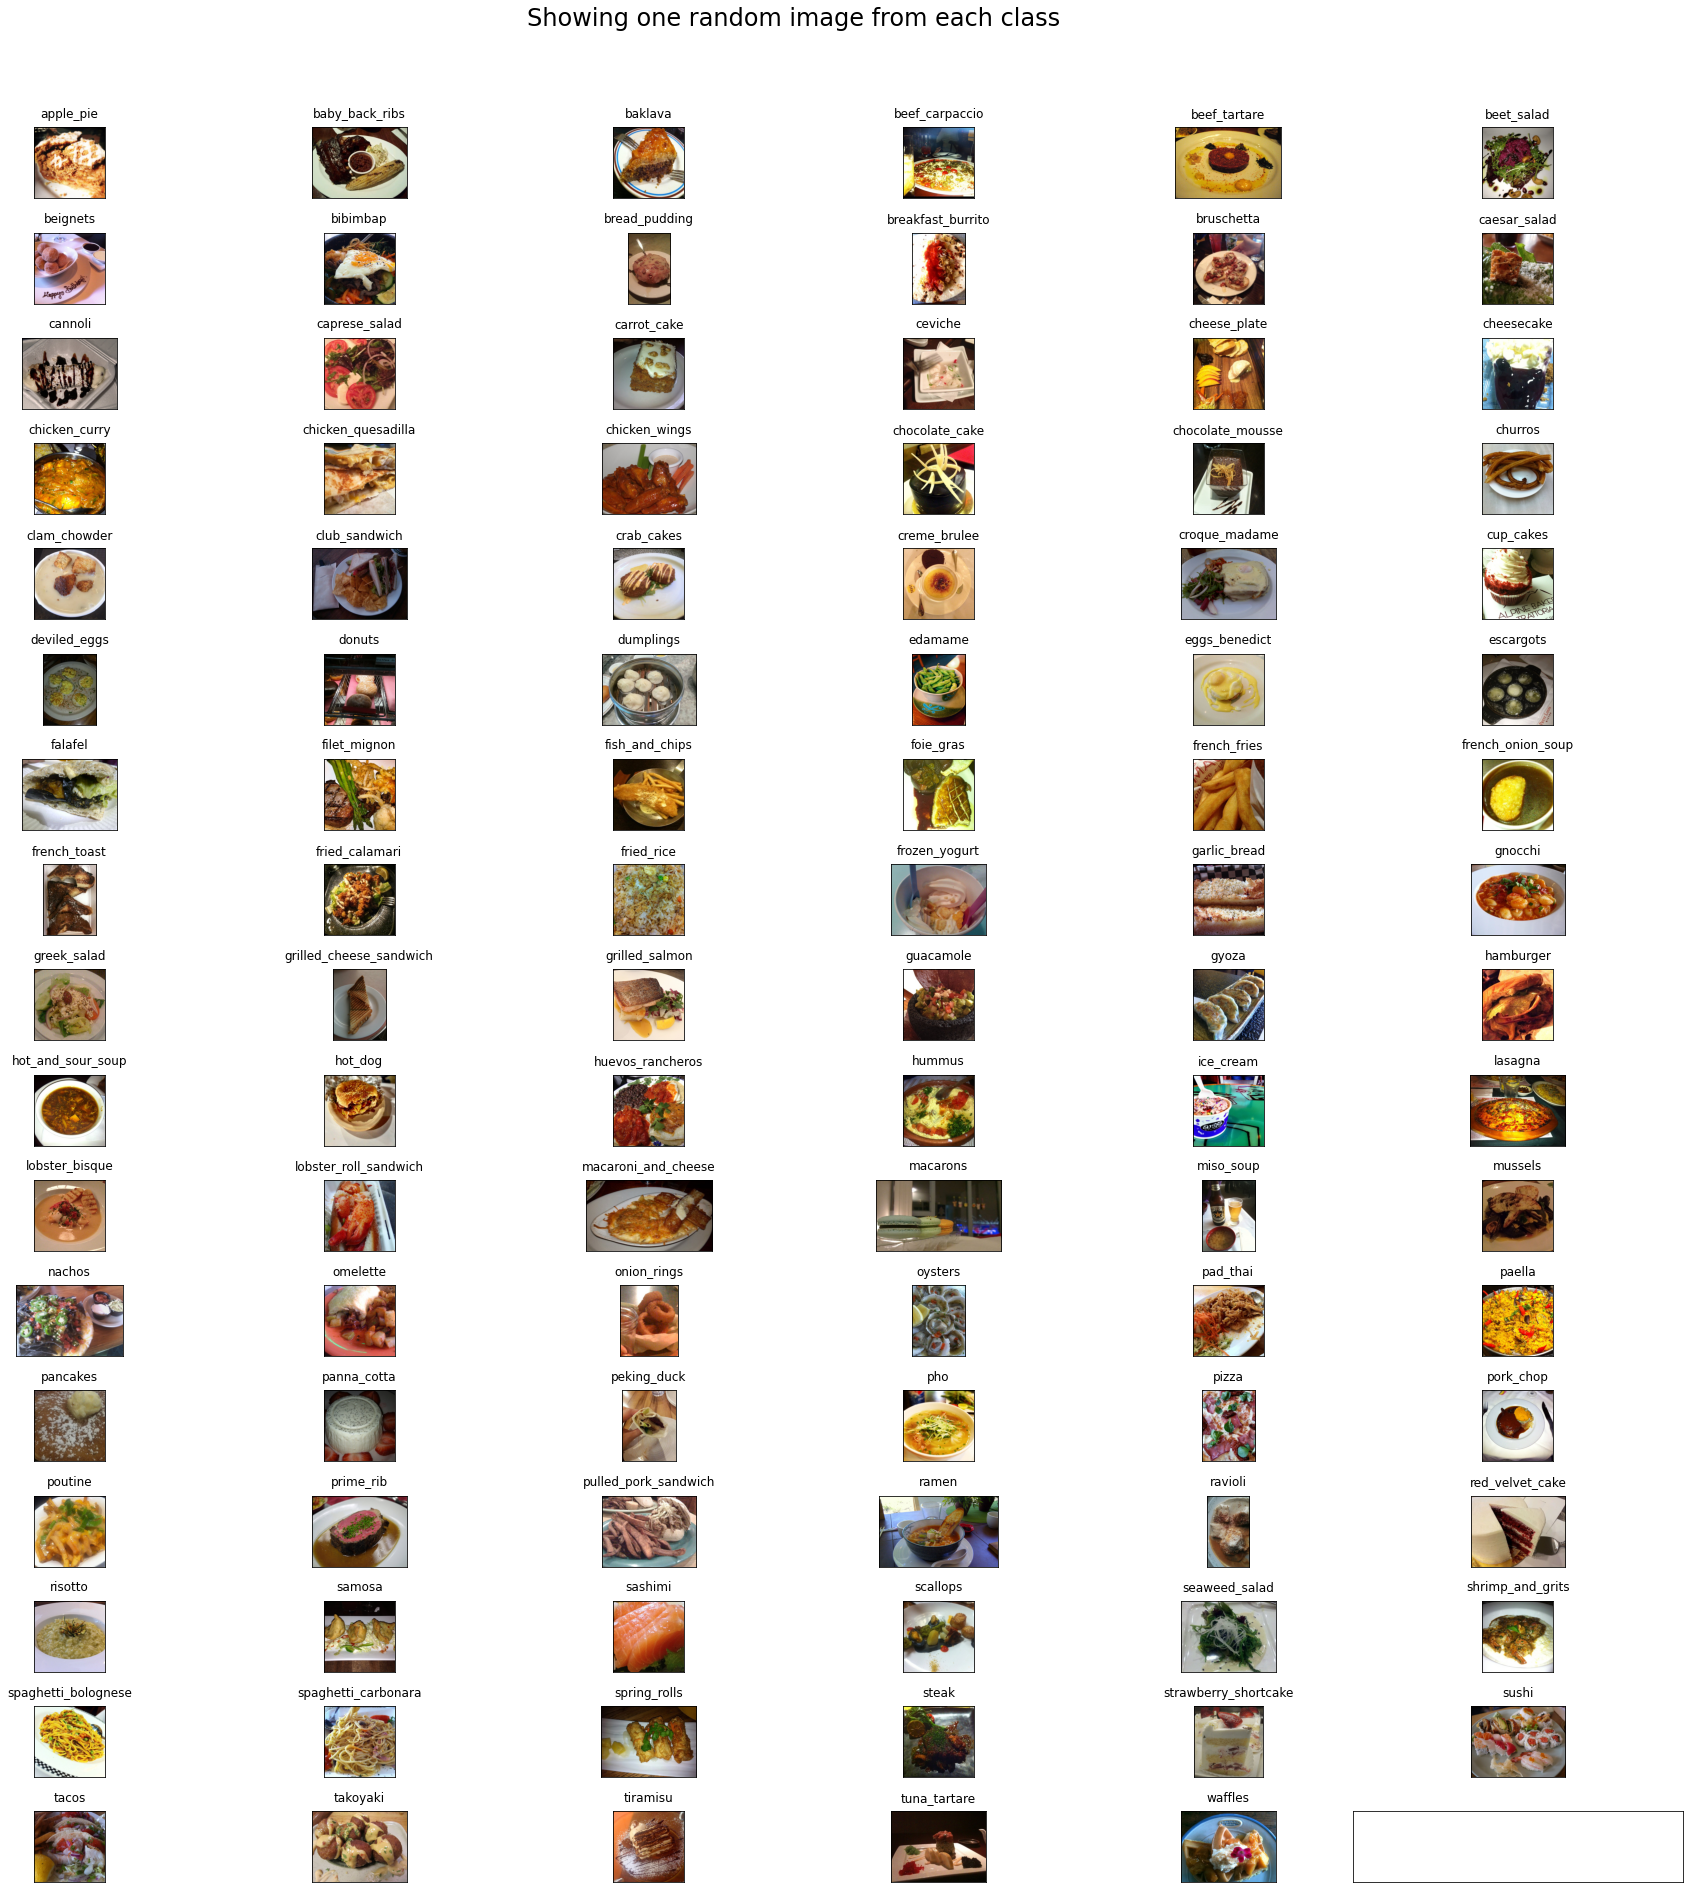

In [ ]:
# Visualize the data, showing one image per class from 101 classes
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "food-101/images/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()


In [ ]:
# Helper method to split dataset into train and test folders
from shutil import copy
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [ ]:
# Prepare train dataset by copying images from food-101/images to food-101/train using the file train.txt
print("Creating train data...")
prepare_data('food-101/meta/train.txt', 'food-101/images', 'food-101/train')

Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [ ]:
# Prepare test data by copying images from food-101/images to food-101/test using the file test.txt
print("Creating test data...")
prepare_data('food-101/meta/test.txt', 'food-101/images', 'food-101/test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [ ]:
# Check how many files are in the train folder
print("Total number of samples in train folder")
!find food-101/train -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
75750


In [ ]:
# Check how many files are in the test folder
print("Total number of samples in test folder")
!find food-101/test -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
25250


In [ ]:
# List of all 101 types of foods(sorted alphabetically)
foods_sorted

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
# Helper method to create train_mini and test_mini data samples
from shutil import copytree, rmtree
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))
      

In [ ]:
# picking 3 food items and generating separate data folders for the same
src_train = 'food-101/train'
dest_train = 'food-101/train_mini'
src_test = 'food-101/test'
dest_test = 'food-101/test_mini'

In [ ]:
# Helper function to select n random food classes
import random
def pick_n_random_classes(n):
  food_list = []
  random_food_indices = random.sample(range(len(foods_sorted)),n) # We are picking n random food classes
  for i in random_food_indices:
    food_list.append(foods_sorted[i])
  food_list.sort()
  print("These are the randomly picked food classes we will be training the model on...\n", food_list)
  return food_list
  

In [ ]:
# Lets try with more classes than just 3. Also, this time lets randomly pick the food classes
n = 11
food_list =  ['french_fries', 'samosa', 'club_sandwich', 'chicken_curry', 'cup_cakes', 'chicken_wings', 'omelette', 'chocolate_cake', 'ice_cream', 'pizza', 'fried_rice']


In [ ]:
# Create the new data subset of n classes
print("Creating training data folder with new classes...")
dataset_mini(food_list, src_train, dest_train)

Creating training data folder with new classes...
Copying images into french_fries
Copying images into samosa
Copying images into club_sandwich
Copying images into chicken_curry
Copying images into cup_cakes
Copying images into chicken_wings
Copying images into omelette
Copying images into chocolate_cake
Copying images into ice_cream
Copying images into pizza
Copying images into fried_rice


In [ ]:
print("Total number of samples in train folder")

!find food-101/train_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
8250


In [ ]:
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

Creating test data folder with new classes
Copying images into french_fries
Copying images into samosa
Copying images into club_sandwich
Copying images into chicken_curry
Copying images into cup_cakes
Copying images into chicken_wings
Copying images into omelette
Copying images into chocolate_cake
Copying images into ice_cream
Copying images into pizza
Copying images into fried_rice


In [ ]:
print("Total number of samples in test folder")
!find food-101/test_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
2750


In [ ]:
# Let's use a pretrained Inceptionv3 model on subset of data with 11 food classes

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
import numpy as np

K.clear_session()

n_classes = n
img_width, img_height = 299, 299
train_data_dir = 'food-101/train_mini'
validation_data_dir = 'food-101/test_mini'
nb_train_samples = 8250 #75750
nb_validation_samples = 2750 #25250
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(n,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_11class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history.log')

history_11class = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=10,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('model_trained_11class.hdf5')


Found 8250 images belonging to 11 classes.
Found 2750 images belonging to 11 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
515/515 [==============================] - ETA: 0s - loss: 2.0632 - accuracy: 0.3844
Epoch 1: val_loss improved from inf to 1.31916, saving model to best_model_11class.hdf5
515/515 [==============================] - 231s 437ms/step - loss: 2.0632 - accuracy: 0.3844 - val_loss: 1.3192 - val_accuracy: 0.7394
Epoch 2/10
515/515 [==============================] - ETA: 0s - loss: 1.2477 - accuracy: 0.6807
Epoch 2: val_loss improved from 1.31916 to 0.72504, saving model to best_model_11class.hdf5
515/515 [==============================] - 223s 432ms/step - loss: 1.2477 - accuracy: 0.6807 - val_loss: 0.7250 - val_accuracy: 0.8480
Epoch 3/10
515/515 [==============================] - ETA: 0s - loss: 0.9262 - accuracy: 0.7590
Epoch 3: val_loss improved from 0.72504 to 0.52866, saving model to best_model_11class.hdf5
515/515 [==============================] - 224s 434ms/step - loss: 0.9262 - accuracy: 0.7590 - val_loss: 0.5287 - val_accuracy: 0.8863
Epoch 4/10
515/515 [===============

In [ ]:
# Loading the best saved model to make predictions
%%time
from tensorflow.keras.models import load_model
K.clear_session()
model_best = load_model('model_trained_11class.hdf5',compile = False)

CPU times: user 2.04 s, sys: 186 ms, total: 2.22 s
Wall time: 2.22 s


In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

In [ ]:
# Downloading images from internet using the URLs
!wget -O frenchfries.jpg https://www.dirtyapronrecipes.com/wp-content/uploads/2017/03/french-fries.jpg
!wget -O chocolatecake.jpg https://tastesbetterfromscratch.com/wp-content/uploads/2010/06/Hersheys-Perfectly-Chocolate-Chocolate-Cake-13.jpg
!wget -O waffles.jpg https://upload.wikimedia.org/wikipedia/commons/5/5b/Waffles_with_Strawberries.jpg
!wget -O applepie.jpg https://www.theseasonedmom.com/wp-content/uploads/2018/08/Moms-Easy-Apple-Pie-10-500x375.jpg

# If you have an image in your local computer and want to try it, uncomment the below code to upload the image files


# from google.colab import files
# image = files.upload()

--2022-06-13 13:01:25--  https://www.dirtyapronrecipes.com/wp-content/uploads/2017/03/french-fries.jpg
Resolving www.dirtyapronrecipes.com (www.dirtyapronrecipes.com)... 162.241.217.105
Connecting to www.dirtyapronrecipes.com (www.dirtyapronrecipes.com)|162.241.217.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94134 (92K) [image/jpeg]
Saving to: ‘frenchfries.jpg’

frenchfries.jpg     100%[===================>]  91.93K  --.-KB/s    in 0.1s    

2022-06-13 13:01:25 (743 KB/s) - ‘frenchfries.jpg’ saved [94134/94134]

--2022-06-13 13:01:25--  https://tastesbetterfromscratch.com/wp-content/uploads/2010/06/Hersheys-Perfectly-Chocolate-Chocolate-Cake-13.jpg
Resolving tastesbetterfromscratch.com (tastesbetterfromscratch.com)... 172.64.149.129, 104.18.38.127, 2606:4700:4400::ac40:9581, ...
Connecting to tastesbetterfromscratch.com (tastesbetterfromscratch.com)|172.64.149.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32401 (32K) [im

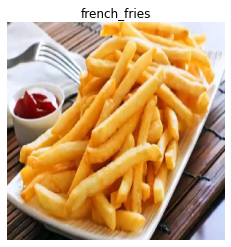

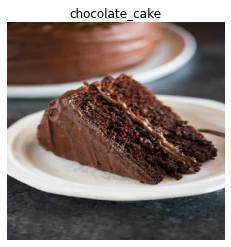

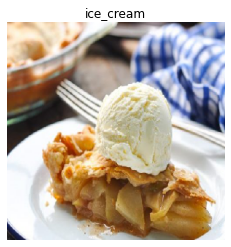

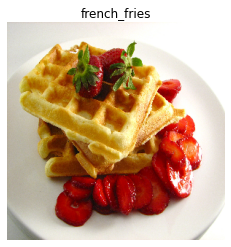

In [ ]:
# Make a list of downloaded images and test the trained model
images = []
images.append('frenchfries.jpg')
images.append('chocolatecake.jpg')
images.append('applepie.jpg')
images.append('waffles.jpg')
predict_class(model_best, images, True)